In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

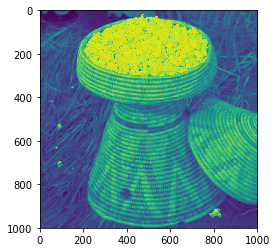

In [399]:
filenamein="palomas.png"
in_img=plt.imread(filenamein)[:,:,0]
width=in_img.shape[0]
plt.imshow(in_img);

In [481]:
AA=np.loadtxt("almapos.txt")

In [530]:
in_img=kernel

In [528]:
ant = 30 # number of antennae, must be between 2 and 50

In [529]:
almal_x=AA[0,:ant]
almal_y=AA[1,:ant]

In [580]:
freq=3e10       # Frequency 6M 9G 12T in Hz
wavel=3e8/freq
bmax=wavel*width/2
print("Max. baseline =",bmax,"m")

Max. baseline = 5.0 m


In [579]:
# if we have our desired baseline, we can calculate required width (1 km)
2*1000/wavel

2666666.6666666665

In [532]:
# Antenna position adjustment to fit max. baseline
dx=almal_x-almal_x.min()
dy=almal_y-almal_y.min()
dmax=np.max([dx.max(),dy.max()])
dnx=dx/dmax
dny=dy/dmax
x=bmax*dnx
y=bmax*dny

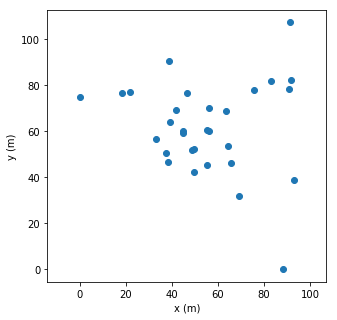

In [533]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.axis("equal");

In [554]:
x=np.linspace(0,1,ant)*bmax
y=np.zeros(ant)

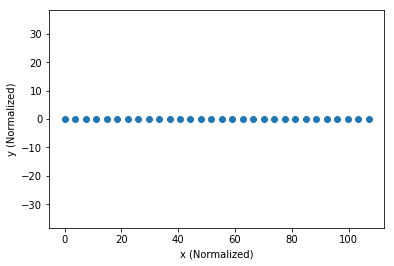

In [555]:
plt.scatter(x,y)
plt.xlabel("x (Normalized)")
plt.ylabel("y (Normalized)")
plt.axis("equal");

In [556]:
lx=np.zeros((ant,ant))
ly=np.zeros((ant,ant))

# calculate relative positions between antennae (baselines for the visibilities)
for i in range(ant):
    for j in range(ant):
        lx[i,j]=(x[i]-x[j])
        ly[i,j]=(y[i]-y[j])

In [557]:
# remember that x and y are swapped in imshow
u=ly/wavel      # u values in wavenumber
v=lx/wavel      # v values in wavenumber
re_u=np.reshape(u,(len(x)**2),order='F') #reshape u into linear form
re_v=np.reshape(v,(len(y)**2),order='F') 

In [568]:
myres=1000.

In [569]:
ore_u=re_u/myres
ore_v=re_v/myres

In [570]:
# UV gridding
# create an empty matrix same size as in image for multiplying with fft of true sky image
# this acts as a mask in fourier space (resolution of exactly 1 px)
obs_uv_matrix=np.zeros(in_img.shape)          
for k in range(len(ore_u)): 
    int_u=int((ore_u)[k])
    int_v=int((ore_v)[k])
    obs_uv_matrix[int_u,int_v]=1.0

obs_uv_matrix[0,0]=0.0 
print('Available uv grid points:',(obs_uv_matrix>0).sum(),'Total visibilities:',ant*(ant-1))

Available uv grid points: 0 Total visibilities: 870


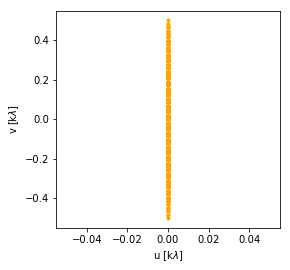

In [571]:
plt.figure(figsize=[4,4]) 
plt.plot(ore_u,ore_v,'.',color='orange')
plt.xlabel('u [k$\lambda$]',size='10')
plt.ylabel('v [k$\lambda$]',size='10')

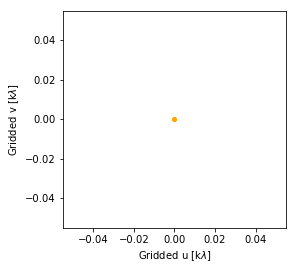

In [572]:
plt.figure(figsize=[4,4]) 
plt.plot(ore_u.astype(int),ore_v.astype(int),'.',color='orange')
plt.xlabel('Gridded u [k$\lambda$]',size='10')
plt.ylabel('Gridded v [k$\lambda$]',size='10')

In [573]:
maxuv=np.max([ore_u.max(),ore_v.max()])

In [574]:
angres=(1/maxuv)*(180/np.pi)
print("Current angular resolution =",angres,"deg")
print("Angular size in the sky=",angres*width,"deg") # needs work
print("Max. baseline for selected resolution =",wavel*maxuv,"m")

Current angular resolution = 114.591559026 deg
Angular size in the sky= 114591.559026 deg
Max. baseline for selected resolution = 0.107142857143 m


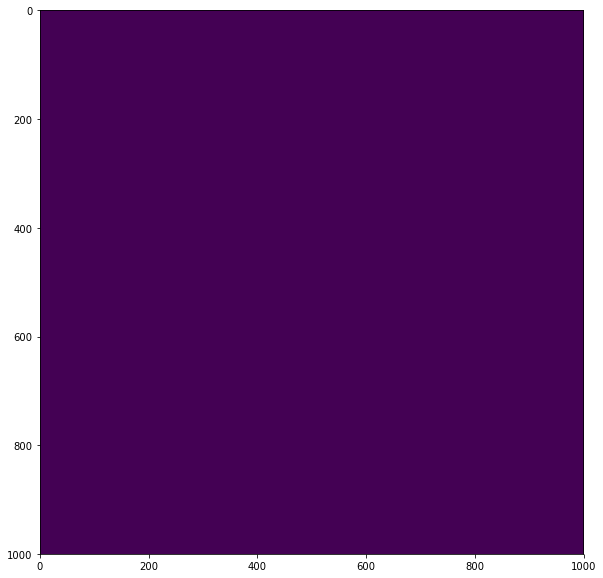

In [575]:
plt.figure(figsize=[10,10]) 
plt.imshow(obs_uv_matrix); # mask

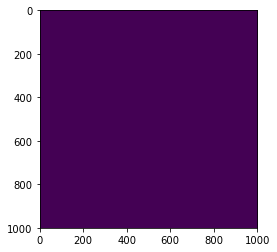

In [576]:
# Transform image to Fourier space, then multiply with uv mask and then apply the inverse FFT to reconstruct image

fft_img=np.fft.fft2(in_img)              #This is the complex visibility from a complete and ideal array from u,v =0,0 outward.
observed=fft_img*obs_uv_matrix           #Observed complex visibility. Combines ideal visibility with the observed uv points, removing those not seen by the selected array configuration.
ifft_img=np.fft.ifft2(observed)          #inverse FFTs the observed visibility
real_ifft_img=ifft_img.real              #Takes real part only for plotting
plt.imshow(real_ifft_img);

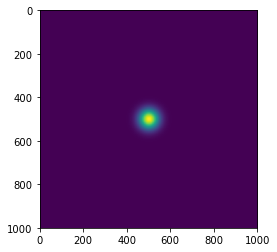

In [577]:
obs_uv_matrix=np.ones(in_img.shape)      #Full uv coverage       
fft_img=np.fft.fft2(in_img)              #This is the complex visibility from a complete and ideal array from u,v =0,0 outward.
observed=fft_img*obs_uv_matrix           #Observed complex visibility. Combines ideal visibility with the observed uv points, removing those not seen by the selected array configuration.
ifft_img=np.fft.ifft2(observed)          #inverse FFTs the observed visibility
real_ifft_img=ifft_img.real              #Takes real part only for plotting
plt.imshow(real_ifft_img)   ;            #Show observed version of input image.



(1000, 1000)

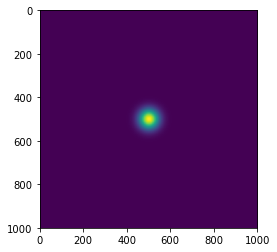

In [60]:
t = np.linspace(-500, 500, 1000)
bump = np.exp(-0.0005*t**2)
bump = bump / np.trapz(bump) # normalize the integral to 1
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]
plt.imshow(kernel)
kernel.shape

In [5]:
from intsim import intsim

Available uv grid points: 1860 Total visibilities: 2450


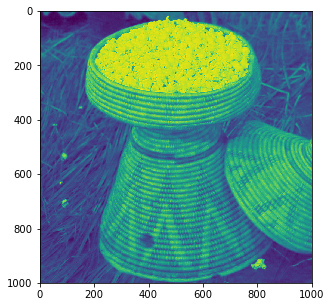

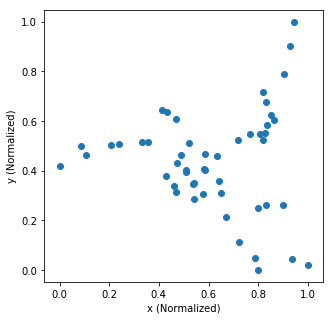

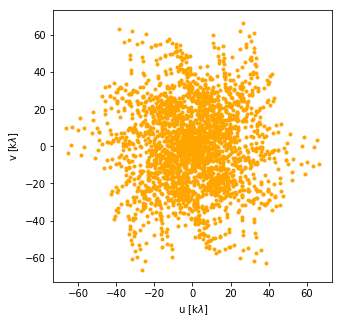

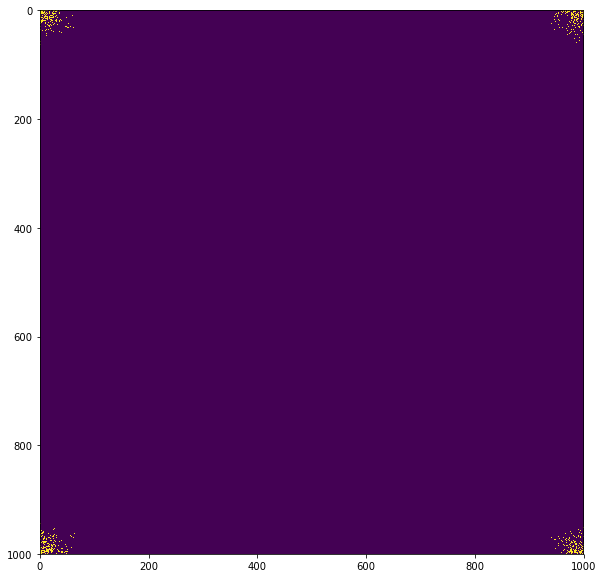

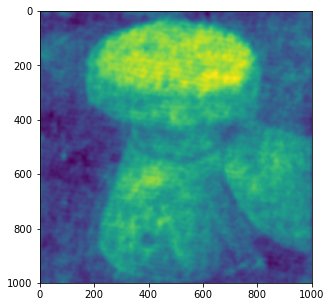

In [6]:
intsim(in_img,50,1e11,15)